_Lambda School Data Science — Tree Ensembles_ 

# Model Interpretation

### Objectives
- Partial Dependence Plots
- Shapley Values


### Pre-reads
1. Kaggle / Dan Becker: Machine Learning Explainability
  - https://www.kaggle.com/dansbecker/partial-plots
  - https://www.kaggle.com/dansbecker/shap-values
2. Christoph Molnar: Interpretable Machine Learning
  - https://christophm.github.io/interpretable-ml-book/pdp.html
  - https://christophm.github.io/interpretable-ml-book/shapley.html 


### Libraries
- [PDPbox](https://github.com/SauceCat/PDPbox): `pip install pdpbox`
- [shap](https://github.com/slundberg/shap): `conda install -c conda-forge shap` / `pip install shap`

  
### Types of explanations

#### Global explanation: all features in relation to each other
- Feature Importances (mean decrease impurity)
- Permutation Importances
- Drop-Column Importances

#### Global explanation: individual feature in relation to target
- Partial Dependence plots

#### Individual prediction explanation
- Shapley Values

_Note that the coefficients from a linear model give you all three types of explanations!_

# Titanic

In [4]:
!echo y | conda install -c conda-forge seaborn

Solving environment: done

## Package Plan ##

  environment location: /Library/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |             py_1         163 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         163 KB

The following NEW packages will be INSTALLED:

  seaborn            conda-forge/noarch::seaborn-0.9.0-py_1


Proceed ([y]/n)? 

seaborn-0.9.0        | 163 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def load_titanic():
    df = sns.load_dataset('titanic')
    df['age'] = df['age'].fillna(df['age'].mean())
    df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
    df['female'] = df['sex'] == 'female'
    X = df[['age', 'class', 'fare', 'female']]
    y = df['survived']
    return X, y

X, y = load_titanic()

#### Naive majority class baseline

In [6]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

#### Logistic Regression

In [7]:
lr = LogisticRegression(solver='lbfgs')
cross_val_score(lr, X, y, scoring='accuracy', cv=5, n_jobs=-1)

array([0.7877095 , 0.78212291, 0.78651685, 0.7752809 , 0.80225989])

In [8]:
lr.fit(X, y)
pd.Series(lr.coef_[0], X.columns)

age      -0.032595
class    -1.112937
fare      0.000805
female    2.512794
dtype: float64

/Library/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


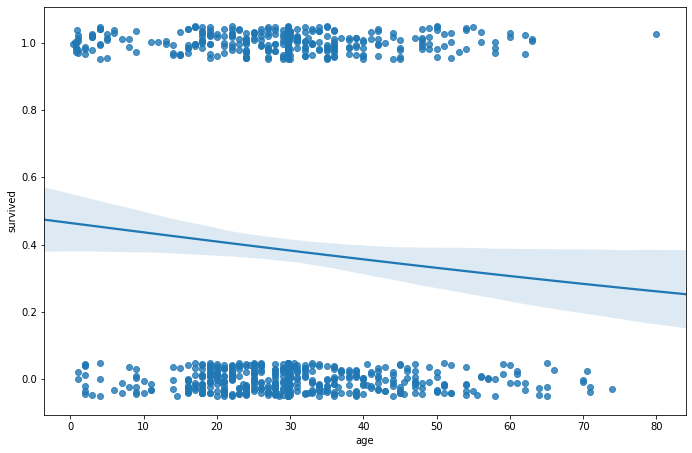

In [9]:
g = sns.regplot(x=X['age'], y=y, logistic=True, y_jitter=.05)
g.figure.set_size_inches(11.5, 7.5)

#### Gradient Boosting

In [10]:
gb = GradientBoostingClassifier()
cross_val_score(gb, X, y, scoring='accuracy', cv=5, n_jobs=-1)

array([0.80446927, 0.82681564, 0.85393258, 0.83146067, 0.84745763])

In [11]:
gb.fit(X, y)
pd.Series(gb.feature_importances_, X.columns)

age       0.131213
class     0.173489
fare      0.199991
female    0.495308
dtype: float64

In [20]:
!echo y | conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Library/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    astor-0.8.0                |           py37_0          45 KB
    c-ares-1.15.0              |    h1de35cc_1001          83 KB
    clang_osx-64-4.0.1         |      h1ce6c1d_16         140 KB
    clangxx_osx-64-4.0.1       |      h22b1bf0_16         140 KB
    conda-4.7.10               |           py37_0         3.0 MB
    conda-package-handling-1.3.11|           py37_0         260 KB
    dill-0.3.0                 |           py37_0         116 KB
    glue-core-0.14.2           |           py37_0         1.4 MB
    libprotobuf-3.8.0          |       hd9629dc_0         4.4 MB
    markdown-3.1.1             |           py37_0         113 KB
    mock-

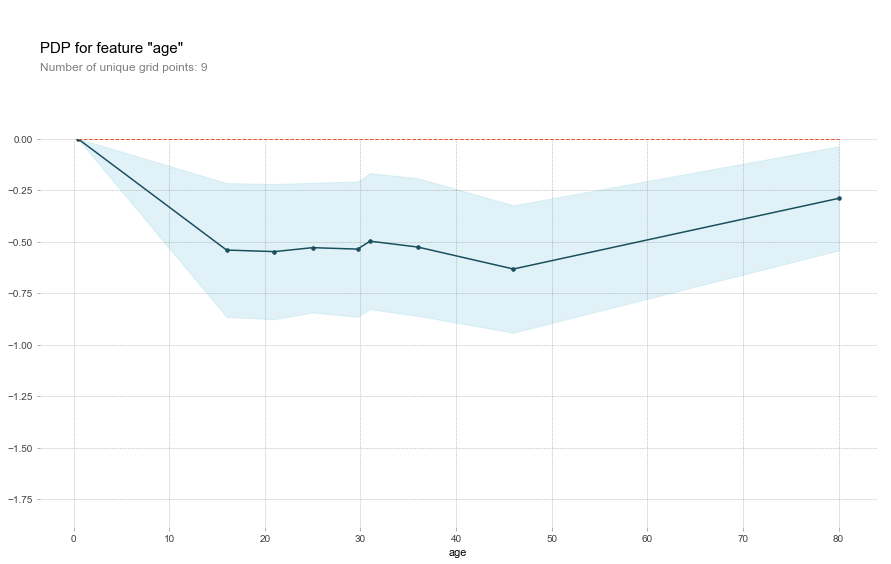

In [21]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='age'
pdp_isolated = pdp_isolate(model=gb, dataset=X, model_features=X.columns, 
                           feature=feature)

pdp_plot(pdp_isolated, feature);

From [PDPbox documentation](https://pdpbox.readthedocs.io/en/latest/):


>**The common headache**: When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is non-monotonic. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

In [18]:
!echo y | conda install -c conda-forge pdpbox

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Library/anaconda3

  added / updated specs:
    - pdpbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    conda-4.7.10               |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.4.1|           py37_0         261 KB  conda-forge
    matplotlib-base-3.1.1      |   py37h3a684a6_1         6.6 MB  conda-forge
    pdpbox-0.2.0               |             py_0        55.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        65.0 MB

The following NEW pa

[Animation by Christoph Molnar](https://twitter.com/ChristophMolnar/status/1066398522608635904), author of [_Interpretable Machine Learning_](https://christophm.github.io/interpretable-ml-book/)

> Partial dependence plots show how a feature affects predictions of a Machine Learning model on average.
> 1. Define grid along feature
> 2. Model predictions at grid points
> 3. Line per data instance -> ICE (Individual Conditional Expectation) curve
> 4. Average curves to get a PDP (Partial Dependence Plot)

#### Compare Predictions

In [16]:
from sklearn.model_selection import cross_val_predict

y_pred_lr = cross_val_predict(lr, X, y, cv=5, n_jobs=-1)
y_pred_gb = cross_val_predict(gb, X, y, cv=5, n_jobs=-1)

preds = pd.DataFrame({'true': y, 'lr': y_pred_lr, 'gb': y_pred_gb})
              
gb_right = preds['gb'] == preds['true']
lr_wrong = preds['lr'] != preds['true']

len(preds[gb_right & lr_wrong]) / len(preds)

0.08417508417508418

In [17]:
preds[gb_right & lr_wrong].head()

,true,lr,gb
27,0,1,0
64,0,1,0
71,0,1,0
74,1,0,1
78,1,0,1


In [18]:
data_for_prediction = X.loc[27]

data_for_prediction

age          19
class         1
fare        263
female    False
Name: 27, dtype: object

#### Explain individual prediction

https://www.kaggle.com/dansbecker/shap-values

In [30]:
#pip install shap
!echo y | conda install -c conda-forge shap

Solving environment: done

## Package Plan ##

  environment location: /Library/anaconda3

  added / updated specs:
    - shap


The following NEW packages will be INSTALLED:

  shap               conda-forge/osx-64::shap-0.29.3-py37h86efe34_0


Proceed ([y]/n)? 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [19]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(gb)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

# Lending Club

In [20]:
import category_encoders as ce
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Load data from https://www.kaggle.com/c/ds1-tree-ensembles/data
X_train = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/train_features.csv')
X_test = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/test_features.csv')
y_train = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/train_labels.csv')['charged_off']
sample_submission = pd.read_csv('/Users/wel51x/Downloads/ds2-tree-ensembles/sample_submission.csv')


def wrangle(X):
    X = X.copy()
    
    # Drop some columns
    X = X.drop(columns='id')  # id is random
    X = X.drop(columns=['member_id', 'url', 'desc'])  # All null
    X = X.drop(columns='title')  # Duplicative of purpose
    X = X.drop(columns='grade')  # Duplicative of sub_grade
    
    # Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
    def wrangle_sub_grade(x):
        first_digit = ord(x[0]) - 64
        second_digit = int(x[1])
        return first_digit + second_digit/10
    
    X['sub_grade'] = X['sub_grade'].apply(wrangle_sub_grade)

    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
        
    # Transform earliest_cr_line to an integer: how many days it's been open
    X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], infer_datetime_format=True)
    X['earliest_cr_line'] = pd.Timestamp.today() - X['earliest_cr_line']
    X['earliest_cr_line'] = X['earliest_cr_line'].dt.days
    
    # Create features for three employee titles: teacher, manager, owner
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)
    
    # Drop categoricals with high cardinality
    X = X.drop(columns=['emp_title', 'zip_code'])
    
    # Transform features with many nulls to binary flags
    many_nulls = ['sec_app_mths_since_last_major_derog',
                  'sec_app_revol_util',
                  'sec_app_earliest_cr_line',
                  'sec_app_mort_acc',
                  'dti_joint',
                  'sec_app_collections_12_mths_ex_med',
                  'sec_app_chargeoff_within_12_mths',
                  'sec_app_num_rev_accts',
                  'sec_app_open_act_il',
                  'sec_app_open_acc',
                  'revol_bal_joint',
                  'annual_inc_joint',
                  'sec_app_inq_last_6mths',
                  'mths_since_last_record',
                  'mths_since_recent_bc_dlq',
                  'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq',
                  'mths_since_last_delinq',
                  'il_util',
                  'emp_length',
                  'mths_since_recent_inq',
                  'mo_sin_old_il_acct',
                  'mths_since_rcnt_il',
                  'num_tl_120dpd_2m',
                  'bc_util',
                  'percent_bc_gt_75',
                  'bc_open_to_buy',
                  'mths_since_recent_bc']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    # Return the wrangled dataframe
    return X


# Wrangle train and test in the same way
X_train = wrangle(X_train)
X_test  = wrangle(X_test)

In [25]:
%%time
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_proba = gb.predict_proba(X_val)[:,1]
print('Validation ROC AUC:', roc_auc_score(y_val, y_pred_proba))

Validation ROC AUC: 0.7226505704278647
CPU times: user 14min 17s, sys: 14.4 s, total: 14min 31s
Wall time: 15min 2s


### Partial Dependence Plot

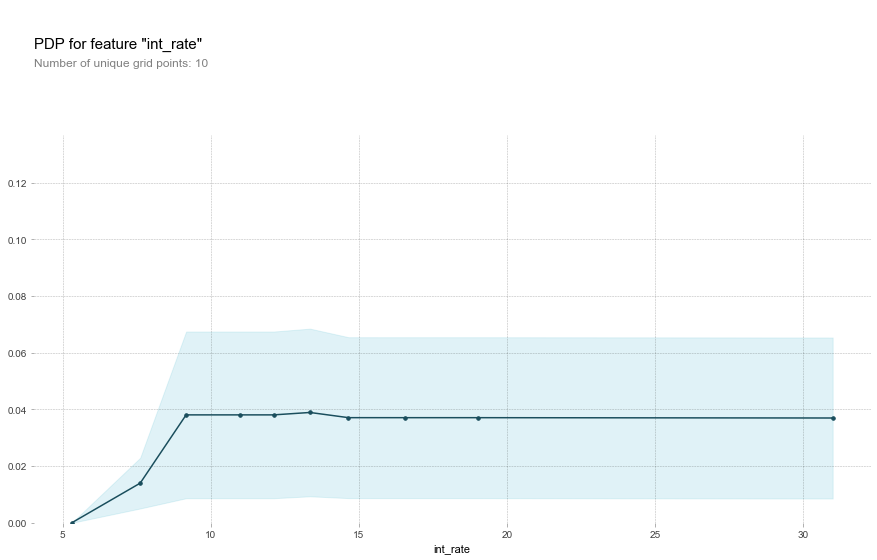

In [26]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='int_rate'
pdp_isolated = pdp_isolate(model=gb, dataset=X_val, 
                           model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

### Individual predictions

In [27]:
import numpy as np
y_pred = (y_pred_proba >= 0.5).astype(int)
confidence = np.abs(y_pred_proba - 0.5)
preds = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred, 
                      'y_pred_proba': y_pred_proba, 
                      'confidence': confidence})

preds.head()

,y_val,y_pred,y_pred_proba,confidence
734948,0,0,0.120889,0.379111
662775,1,0,0.444685,0.055315
1293995,0,0,0.184529,0.315471
121846,0,0,0.055538,0.444462
1040519,0,0,0.105202,0.394798


In [28]:
# True positives, with high confidence
preds[(y_val==1) & (y_pred==1)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
509674,1,1,0.778066,0.278066
1075507,1,1,0.746171,0.246171
1237423,1,1,0.729384,0.229384
525726,1,1,0.725751,0.225751
411364,1,1,0.725219,0.225219


In [30]:
X_val.shape

(209513, 98)

In [32]:
data_for_prediction = X_val.iloc[17575]
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)


In [33]:
# True negatives, with high confidence
preds[(y_val==0) & (y_pred==0)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
716929,0,0,0.025035,0.474965
1024450,0,0,0.025919,0.474081
440926,0,0,0.025988,0.474012
626127,0,0,0.026001,0.473999
1129419,0,0,0.026023,0.473977


In [34]:
data_for_prediction = X_val.loc[1778]
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)


In [35]:
# False positives, with high (mistaken) confidence
preds[(y_val==0) & (y_pred==1)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
929700,0,1,0.733019,0.233019
1124876,0,1,0.724849,0.224849
1218998,0,1,0.713815,0.213815
14044,0,1,0.708883,0.208883
314029,0,1,0.708107,0.208107


In [36]:
data_for_prediction = X_val.loc[33542]
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)



In [37]:
data_for_prediction

loan_amnt                               12000
funded_amnt                             12000
term                                        1
int_rate                                 8.18
installment                            377.04
sub_grade                                 2.1
emp_length                              False
home_ownership                              3
annual_inc                             100000
purpose                                     2
addr_state                                  9
dti                                      5.09
delinq_2yrs                                 0
earliest_cr_line                         7035
inq_last_6mths                              0
mths_since_last_delinq                  False
mths_since_last_record                  False
open_acc                                    7
pub_rec                                     1
revol_bal                               15692
revol_util                               61.3
total_acc                         

In [38]:
# False negatives, with high (mistaken) confidence
preds[(y_val==1) & (y_pred==0)].sort_values(by='confidence', ascending=False).head()


,y_val,y_pred,y_pred_proba,confidence
923003,1,0,0.028394,0.471606
374806,1,0,0.029279,0.470721
415599,1,0,0.031176,0.468824
1117287,1,0,0.031621,0.468379
1049990,1,0,0.031804,0.468196


In [40]:
data_for_prediction = X_val.iloc[30492]
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)



In [41]:
# Most uncertain predictions (least confidence)
preds.sort_values(by='confidence', ascending=True).head()

,y_val,y_pred,y_pred_proba,confidence
1224267,0,0,0.499996,0.000004
1041474,0,0,0.499991,0.000009
1115932,0,0,0.499979,0.000021
926988,1,0,0.499973,0.000027
1032678,0,0,0.499969,0.000031


In [43]:
data_for_prediction = X_val.iloc[33095]
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, 
                data_for_prediction)


In [44]:
data_for_prediction

loan_amnt                               15600
funded_amnt                             15600
term                                        1
int_rate                                 26.3
installment                            631.03
sub_grade                                 5.5
emp_length                              False
home_ownership                              1
annual_inc                              42000
purpose                                     2
addr_state                                 32
dti                                     30.66
delinq_2yrs                                 1
earliest_cr_line                         6152
inq_last_6mths                              0
mths_since_last_delinq                  False
mths_since_last_record                   True
open_acc                                   11
pub_rec                                     0
revol_bal                                5187
revol_util                               66.5
total_acc                         